In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn.objects as so
from seaborn import axes_style, color_palette

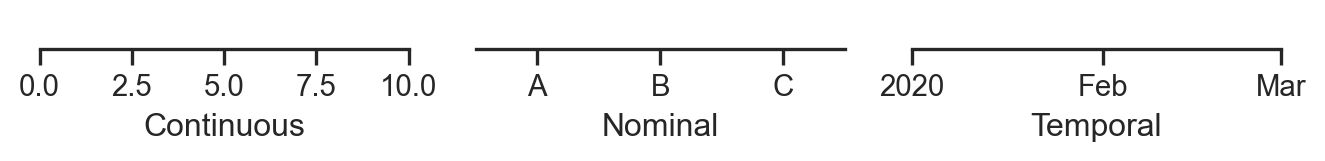

In [2]:
(
    so.Plot(y=[0, 0, 0])
    .pair(x=[
        [1, 2, 3],
        ["A", "B", "C"],
        np.array(["2020-01-01", "2020-02-01", "2020-03-01"], dtype="datetime64"),
    ])
    .limit(
        x0=(0, 10),
        x1=(-.5, 2.5),
        x2=(pd.Timestamp("2020-01-01"), pd.Timestamp("2020-03-01"))
    )
    .scale(y=so.Continuous().tick(count=0), x2=so.Temporal().label(concise=True))
    .layout(size=(7, 1), engine="tight")
    .label(x0="Continuous", x1="Nominal", x2="Temporal")
    .theme({
        **axes_style("ticks"),
        **{f"axes.spines.{side}": False for side in ["left", "right", "top"]},
    })
)

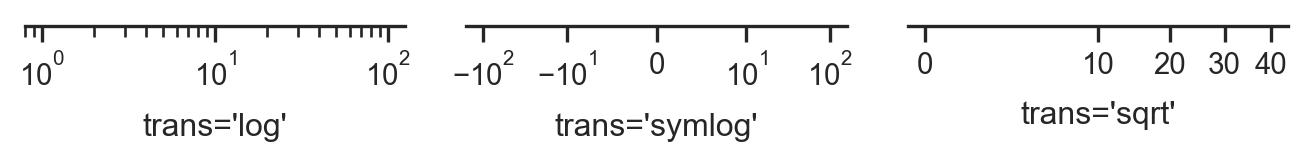

In [3]:
(
    so.Plot(y=[0, 0, 0])
    .pair(x=[[1, 10, 100], [-100, 0, 100], [0, 10, 40]])
    .limit(
    )
    .add(so.Dot(marker=""))
    .scale(
        y=so.Continuous().tick(count=0),
        x0=so.Continuous(trans="log"),
        x1=so.Continuous(trans="symlog").tick(at=[-100, -10, 0, 10, 100]),
        x2=so.Continuous(trans="sqrt").tick(every=10),
    )
    .layout(size=(7, 1), engine="tight")
    .label(x0="trans='log'", x1="trans='symlog'", x2="trans='sqrt'")
    .theme({
        **axes_style("ticks"),
        **{f"axes.spines.{side}": False for side in ["left", "right", "top"]},
        "axes.labelpad": 8,
    })
)

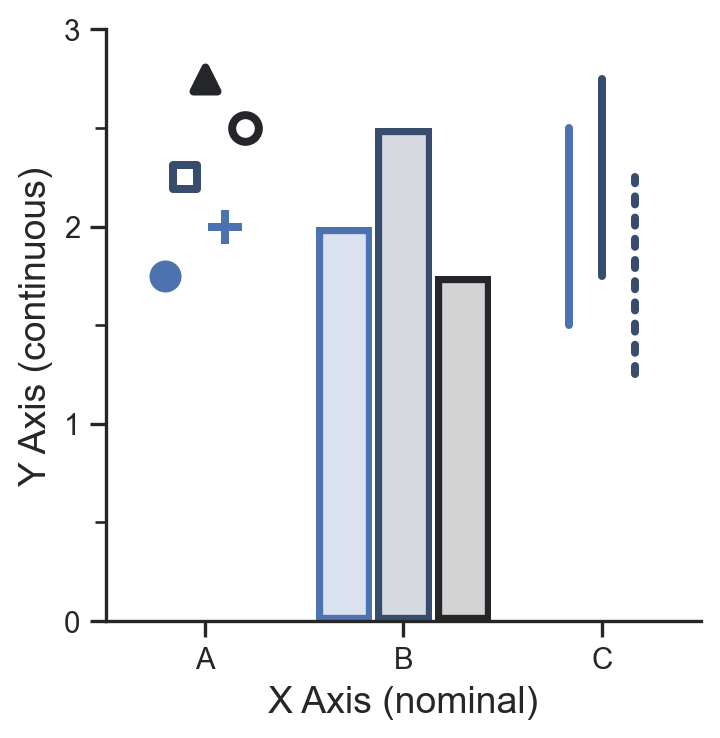

In [4]:
# Hiding from the page but keeping around for now
(
    so.Plot()
    .add(
        so.Dot(edgewidth=3, stroke=3),
        so.Dodge(by=["group"]),
        x=["A", "A", "A", "A", "A"],
        y=[1.75, 2.25, 2.75, 2.0, 2.5],
        color=[1, 2, 3, 1, 3],
        marker=[mpl.markers.MarkerStyle(x) for x in "os^+o"],
        pointsize=(9, 9, 9, 13, 10),
        fill=[True, False, True, True, False],
        group=[1, 2, 3, 4, 5], width=.5, legend=False,
    )
    .add(
        so.Bar(edgewidth=2.5, alpha=.2, width=.9),
        so.Dodge(gap=.05),
        x=["B", "B", "B",], y=[2, 2.5, 1.75], color=[1, 2, 3],
        legend=False,
    )
    .add(
        so.Range({"capstyle": "round"}, linewidth=3),
        so.Dodge(by=["group"]),
        x=["C", "C", "C"], ymin=[1.5, 1.75, 1.25], ymax=[2.5, 2.75, 2.25],
        color=[1, 2, 2], linestyle=["-", "-", ":"],
        group=[1, 2, 3], width=.5, legend=False,
    )
    .layout(size=(4, 4), engine=None)
    .limit(x=(-.5, 2.5), y=(0, 3))
    .label(x="X Axis (nominal)", y="Y Axis (continuous)")
    .scale(
        color="dark:C0_r", #None,
        fill=None, marker=None,
        pointsize=None, linestyle=None,
        y=so.Continuous().tick(every=1, minor=1)
    )
    .theme({
        **axes_style("ticks"),
        "axes.spines.top": False, "axes.spines.right": False,
        "axes.labelsize": 14,
    })
)

In [5]:
no_spines = {
    f"axes.spines.{side}": False
    for side in ["left", "right", "bottom", "top"]
}

In [6]:
color_mark = so.Dot(marker="s", pointsize=20, edgewidth=2.5, alpha=.7, edgealpha=1)
color_plot = (
    so.Plot()
    .theme({
        **axes_style("white"),
        **no_spines,
        "axes.titlesize": 15,
        "figure.subplot.wspace": .1,
        "axes.xmargin": .1,
    })
    .scale(
        x=so.Continuous().tick(count=0),
        y=so.Continuous().tick(count=0),
        color=None, edgecolor=None,
    )
    .layout(size=(9, .5), engine=None)
)

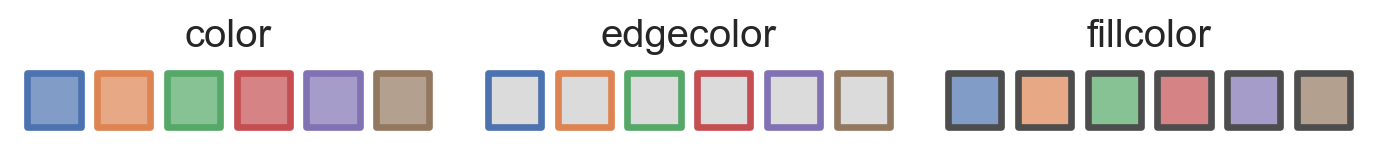

In [7]:
n = 6
rgb = [f"C{i}" for i in range(n)]
(
    color_plot
    .facet(["color"] * n + ["edgecolor"] * n + ["fillcolor"] * n)
    .add(
        color_mark,
        x=np.tile(np.arange(n), 3),
        y=np.zeros(n * 3),
        color=rgb + [".8"] * n + rgb,
        edgecolor=rgb + rgb + [".3"] * n,
        legend=False,
    )
    .plot()
)

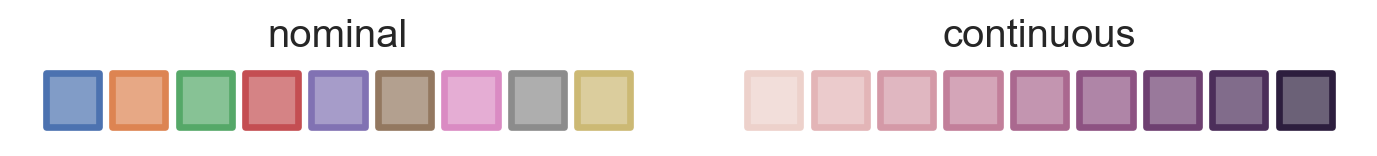

In [8]:
n = 9
rgb = color_palette("deep", n) + color_palette("ch:", n)
(
    color_plot
    .facet(["nominal"] * n + ["continuous"] * n)
    .add(
        color_mark,
        x=list(range(n)) * 2,
        y=[0] * n * 2,
        color=rgb,
        legend=False,
    )
    .plot()
)

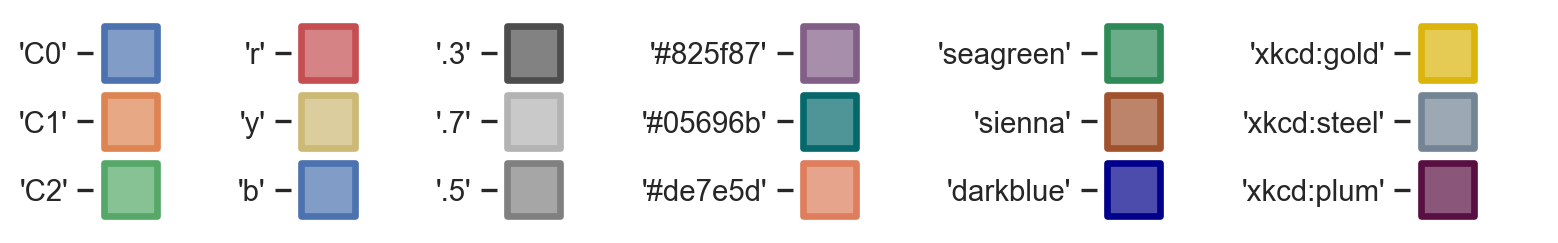

In [9]:
color_dict = {
    "cycle": ["C0", "C1", "C2"],
    "short": ["r", "y", "b"],
    "gray": [".3", ".7", ".5"],
    "hex": ["#825f87", "#05696b", "#de7e5d"],
    "X11": ["seagreen", "sienna", "darkblue"],
    "XKCD": ["xkcd:gold", "xkcd:steel", "xkcd:plum"],
}
groups = [k for k in color_dict for _ in range(3)]
colors = [c for pal in color_dict.values() for c in pal]
(
    so.Plot(
        x=[0] * len(colors),
        y=[f"'{c}'" for c in colors],
        color=colors,
    )
    .theme({
        **axes_style("ticks"),
        **no_spines,
        "axes.ymargin": .2,
        "axes.titlesize": 14,
        
    })
    .facet(groups)
    .layout(size=(8, 1.15), engine="constrained")
    .scale(x=so.Continuous().tick(count=0))
    .add(color_mark)
    .limit(x=(-.2, .5))
    # .label(title="{}      ".format)
    .label(title="")
    .scale(color=None)
    .share(y=False)
    .plot()
)

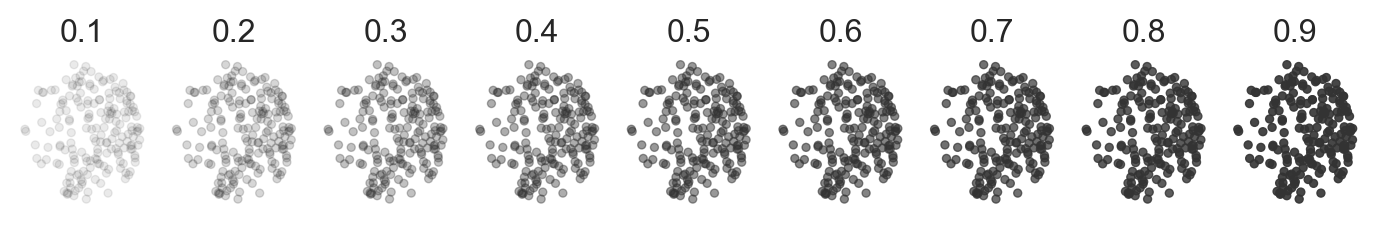

In [10]:
rng = np.random.default_rng(3)
n_samp = 300
x = 1 - rng.exponential(size=n_samp)
y = rng.uniform(-1, 1, size=n_samp)
keep = np.sqrt(x ** 2 + y ** 2) < 1
x, y = x[keep], y[keep]
n = keep.sum()
alpha_vals = np.linspace(.1, .9, 9).round(1)
xs = np.concatenate([x for _ in alpha_vals])
ys = np.concatenate([y for _ in alpha_vals])
alphas = np.repeat(alpha_vals, n)
(
    so.Plot(x=xs, y=ys, alpha=alphas)
    .facet(alphas)
    .add(so.Dot(color=".2", pointsize=3))
    .scale(
        alpha=None,
        x=so.Continuous().tick(count=0),
        y=so.Continuous().tick(count=0)
    )
    .layout(size=(9, 1), engine=None)
    .theme({
        **axes_style("white"),
        **no_spines,
    })
)

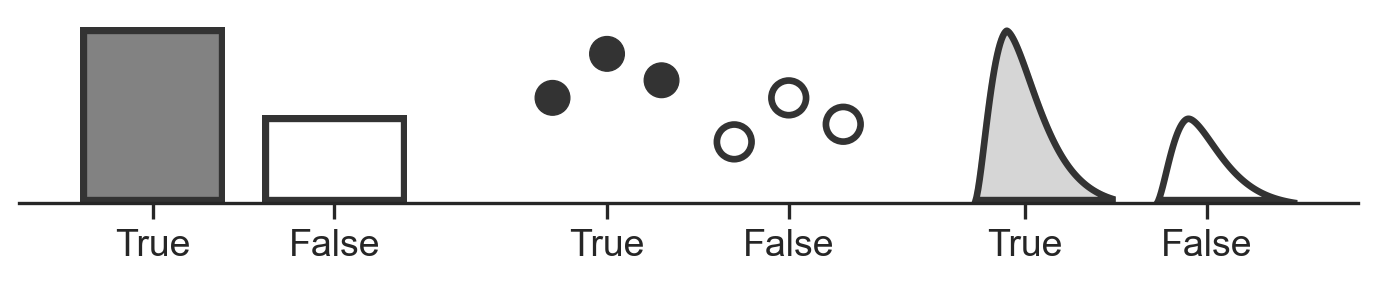

In [11]:
nan = float("nan")
x_bar = [0, 1]
y_bar = [2, 1]
f_bar = [True, False]

x_dot = [2.2, 2.5, 2.8, 3.2, 3.5, 3.8]
y_dot = [1.2, 1.7, 1.4, 0.7, 1.2, 0.9]
f_dot = [True, True, True, False, False, False]

xx = np.linspace(0, .8, 100)
yy = xx ** 2 * np.exp(-xx * 10)
x_area = list(4.5 + xx) + list(5.5 + xx)
y_area = list(yy / yy.max() * 2) + list(yy / yy.max())
f_area = [True] * 100 + [False] * 100

(
    so.Plot()
    .add(
        so.Bar(color=".3", edgecolor=".2", edgewidth=2.5),
        x=x_bar + [nan for _ in x_dot + x_area],
        y=y_bar + [nan for _ in y_dot + y_area],
        fill=f_bar + [nan for _ in f_dot + f_area]
    )
    .add(
        so.Dot(color=".2", pointsize=13, stroke=2.5),
        x=[nan for _ in x_bar] + x_dot + [nan for _ in x_area],
        y=[nan for _ in y_bar] + y_dot + [nan for _ in y_area],
        fill=[nan for _ in f_bar] + f_dot + [nan for _ in f_area],
    )
    .add(
        so.Area(color=".2", edgewidth=2.5),
        x=[nan for _ in x_bar + x_dot] + x_area,
        y=[nan for _ in y_bar + y_dot] + y_area,
        fill=[nan for _ in f_bar + f_dot] + f_area,
    )
    .theme({
        **axes_style("ticks"),
        "axes.spines.left": False,
        "axes.spines.top": False,
        "axes.spines.right": False,
        "xtick.labelsize": 14,
    })
    .layout(size=(9, 1.25), engine=None)
    .scale(
        fill=None,
        x=so.Continuous().tick(at=[0, 1, 2.5, 3.5, 4.8, 5.8]).label(
            like={
                0: True, 1: False, 2.5: True, 3.5: False, 4.8: True, 5.8: False
            }.get,
        ),
        y=so.Continuous().tick(count=0),
    )
)

In [12]:
marker_plot = (
    so.Plot()
    .scale(marker=None, y=so.Continuous().tick(count=0))
    .layout(size=(10, .5), engine=None)
    .theme({
        **axes_style("ticks"),
        "axes.spines.left": False,
        "axes.spines.top": False,
        "axes.spines.right": False,
        "xtick.labelsize":12,
        "axes.xmargin": .02,
    })

)
marker_mark = so.Dot(pointsize=15, color=".2", stroke=1.5)

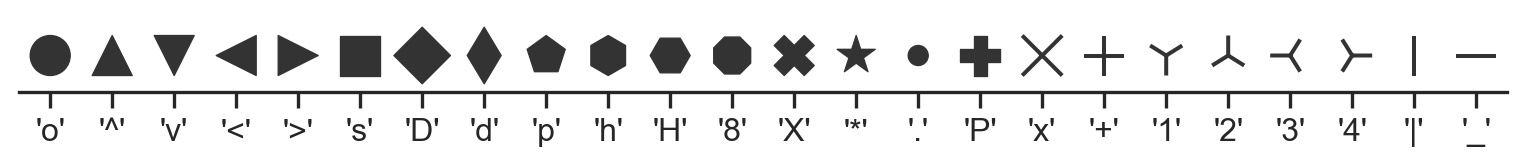

In [13]:
marker_codes = [
    "o", "^", "v", "<", ">","s", "D", "d", "p", "h", "H", "8",
    "X", "*", ".", "P", "x", "+", "1", "2", "3", "4", "|", "_",
]
x, y = [f"'{m}'" for m in marker_codes], [0] * len(marker_codes)
marker_objs = [mpl.markers.MarkerStyle(m) for m in marker_codes]
marker_plot.add(marker_mark, marker=marker_objs, x=x, y=y).plot()

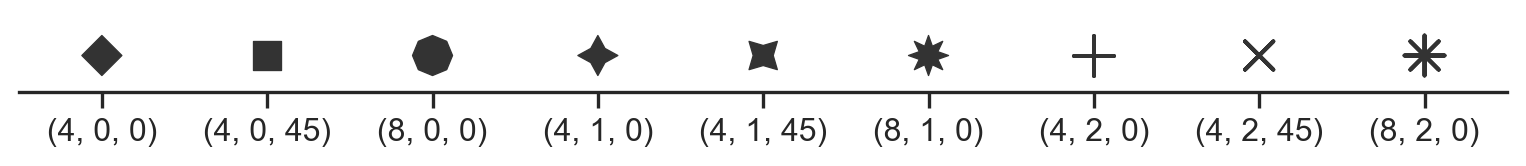

In [14]:
marker_codes = [
    (4, 0, 0), (4, 0, 45), (8, 0, 0),
    (4, 1, 0), (4, 1, 45), (8, 1, 0),
    (4, 2, 0), (4, 2, 45), (8, 2, 0),
]
x, y = [f"{m}" for m in marker_codes], [0] * len(marker_codes)
marker_objs = [mpl.markers.MarkerStyle(m) for m in marker_codes]
marker_plot.add(marker_mark, marker=marker_objs, x=x, y=y).plot()

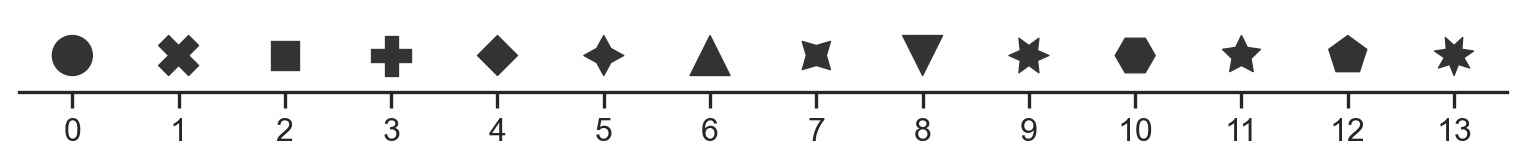

In [15]:
from seaborn._core.properties import Marker
n = 14
marker_objs = Marker()._default_values(n)
x, y = list(map(str, range(n))), [0] * n
marker_plot.add(marker_mark, marker=marker_objs, x=x, y=y).plot()

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
C:\Users\huzhe\AppData\Local\Temp\ipykernel_17972\3293195729.py:17: SyntaxWarning: invalid escape sequence '\m'
  i: f"'$\mathtt{{{pat}}}$'" if isinstance(pat, str) else pat


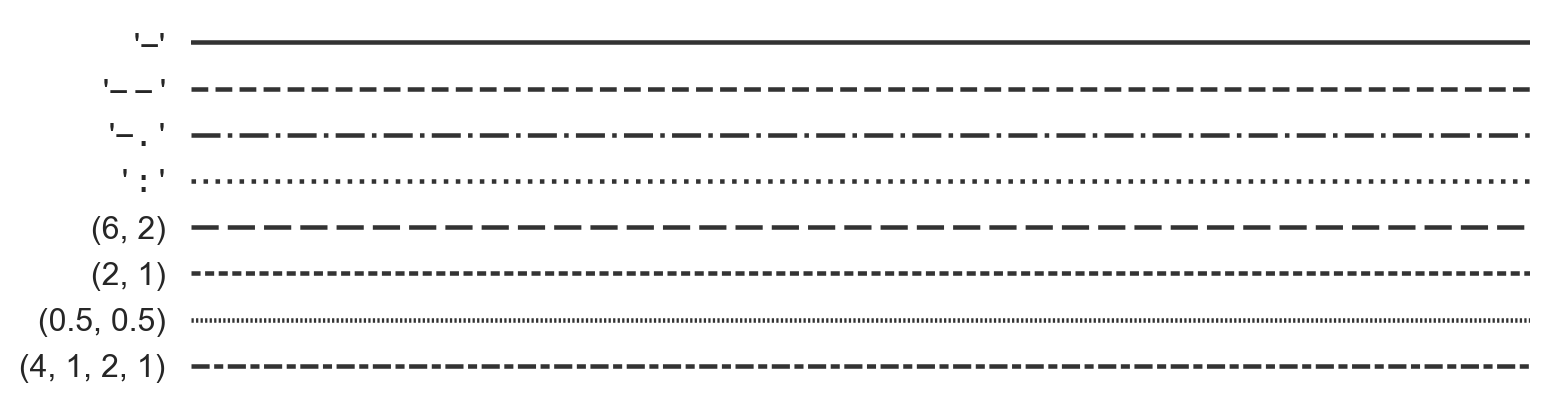

In [16]:
xx = np.linspace(0, 1, 100)
dashes = ["-", "--", "-.", ":", (6, 2), (2, 1), (.5, .5), (4, 1, 2, 1)] 
dash_data = (
    pd.DataFrame({i: xx for i in range(len(dashes))})
    .stack()
    .reset_index(1)
    .set_axis(["y", "x"], axis=1)
    .reset_index(drop=True)
)
(
    so.Plot(dash_data, "x", "y", linestyle="y")
    .add(so.Line(linewidth=1.7, color=".2"), legend=None)
    .scale(
        linestyle=dashes,
        x=so.Continuous().tick(count=0),
        y=so.Continuous().tick(every=1).label(like={
            i: f"'$\mathtt{{{pat}}}$'" if isinstance(pat, str) else pat
            for i, pat in enumerate(dashes)
        }.get)
    )
    .label(x="", y="")
    .limit(x=(0, 1), y=(7.5, -0.5))
    .layout(size=(9, 2.5), engine=None)
    .theme({
        **axes_style("white"),
        **no_spines,
        "ytick.labelsize": 12,
    })
)

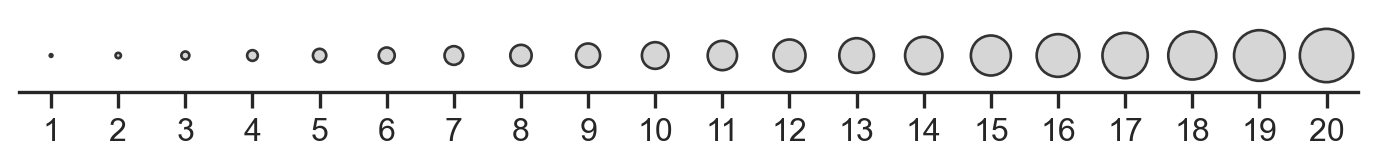

In [17]:
x = np.arange(1, 21)
y = [0 for _ in x]
(
    so.Plot(x, y)
    .add(so.Dots(color=".2", stroke=1), pointsize=x)
    .layout(size=(9, .5), engine=None)
    .theme({
        **axes_style("ticks"),
        **{f"axes.spines.{side}": False for side in ["left", "right", "top"]},
        "xtick.labelsize": 12,
        "axes.xmargin": .025,
    })
    .scale(
        pointsize=None,
        x=so.Continuous().tick(every=1),
        y=so.Continuous().tick(count=0),
    )
)

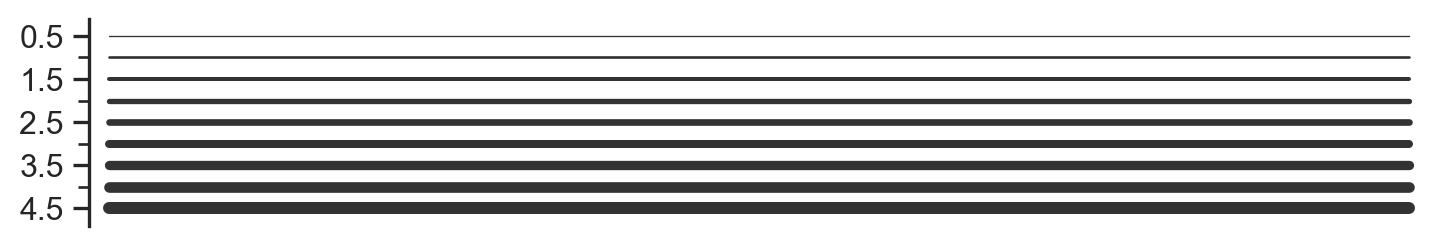

In [18]:
lw = np.arange(0.5, 5, .5)
x = [i for i in [0, 1] for _ in lw]
y = [*lw, *lw]
(
    so.Plot(x=x, y=y, linewidth=y)
    .add(so.Line(color=".2"))
    .limit(y=(4.9, .1))
    .layout(size=(9, 1.4), engine=None)
    .theme({
        **axes_style("ticks"),
        **{f"axes.spines.{side}": False for side in ["bottom", "right", "top"]},
        "xtick.labelsize": 12,
        "axes.xmargin": .015,
        "ytick.labelsize": 12,
    })
    .scale(
        linewidth=None,
        x=so.Continuous().tick(count=0),
        y=so.Continuous().tick(every=1, between=(.5, 4.5), minor=1),
    )
)

In [19]:
x = np.arange(0, 21) / 5
y = [0 for _ in x]
edge_plot = (
    so.Plot(x, y)
    .layout(size=(9, .5), engine=None)
    .theme({
        **axes_style("ticks"),
        **{f"axes.spines.{side}": False for side in ["left", "right", "top"]},
        "xtick.labelsize": 12,
        "axes.xmargin": .02,
    })
    .scale(
        x=so.Continuous().tick(every=1, minor=4),
        y=so.Continuous().tick(count=0),
    )
)

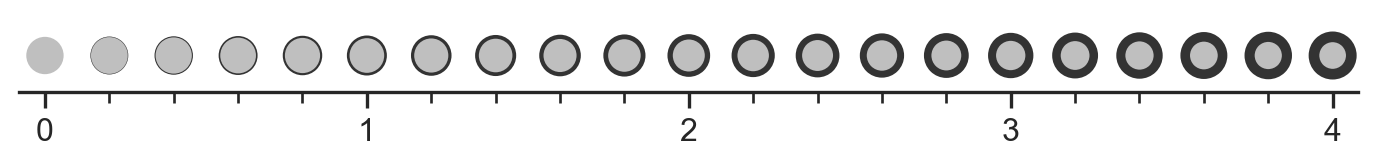

In [20]:
(
    edge_plot
    .add(so.Dot(color=".75", edgecolor=".2", marker="o", pointsize=14), edgewidth=x)
    .scale(edgewidth=None)
    .plot()
)

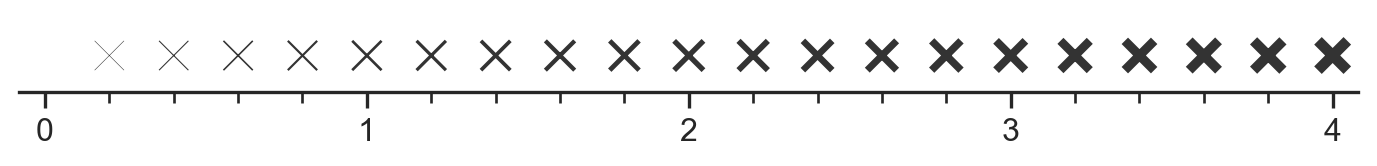

In [21]:
(
    edge_plot
    .add(so.Dot(color=".2", marker="x", pointsize=11), stroke=x)
    .scale(stroke=None)
    .plot()
)

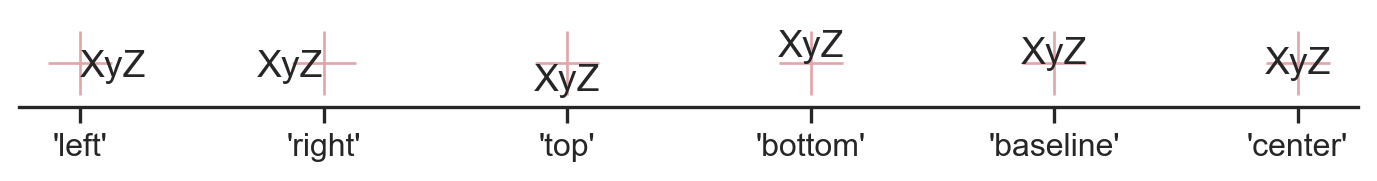

In [22]:
x = ["left", "right", "top", "bottom", "baseline", "center"]
ha = x[:2] + ["center"] * 4
va = ["center_baseline"] * 2 + x[2:]
y = np.zeros(len(x))
(
    so.Plot(x=[f"'{_x_}'" for _x_ in x], y=y, halign=ha, valign=va)
    .add(so.Dot(marker="+", color="r", alpha=.5, stroke=1, pointsize=24))
    .add(so.Text(text="XyZ", fontsize=14, offset=0))
    .scale(y=so.Continuous().tick(at=[]), halign=None, valign=None)
    .limit(x=(-.25, len(x) - .75))
    .layout(size=(9, .6), engine=None)
    .theme({
        **axes_style("ticks"),
        **{f"axes.spines.{side}": False for side in ["left", "right", "top"]},
        "xtick.labelsize": 12,
        "axes.xmargin": .015,
        "ytick.labelsize": 12,
    })
    .plot()
)

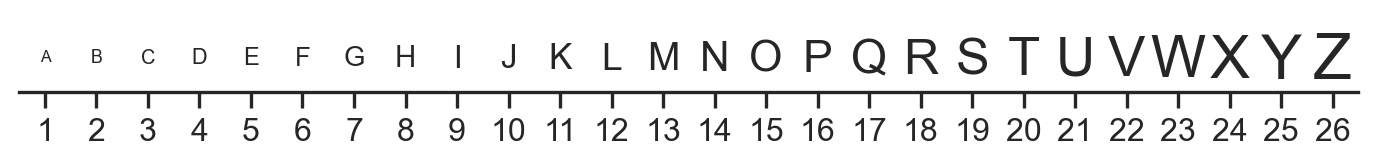

In [23]:
from string import ascii_uppercase
n = 26
s = np.arange(n) + 1
y = np.zeros(n)
t = list(ascii_uppercase[:n])
(
    so.Plot(x=s, y=y, text=t, fontsize=s)
    .add(so.Text())
    .scale(x=so.Nominal(), y=so.Continuous().tick(at=[]))
    .layout(size=(9, .5), engine=None)
    .theme({
        **axes_style("ticks"),
        **{f"axes.spines.{side}": False for side in ["left", "right", "top"]},
        "xtick.labelsize": 12,
        "axes.xmargin": .015,
        "ytick.labelsize": 12,
    })
    .plot()
)

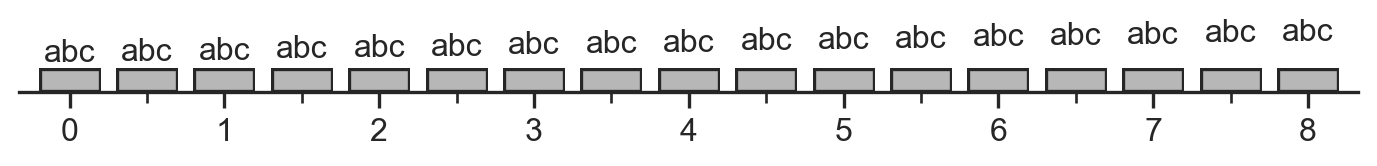

In [24]:
n = 17
x = np.linspace(0, 8, n)
y = np.full(n, .5)
(
    so.Plot(x=x, y=y, offset=x)
    .add(so.Bar(color=".6", edgecolor="k"))
    .add(so.Text(text="abc", valign="bottom"))
    .scale(
        x=so.Continuous().tick(every=1, minor=1),
        y=so.Continuous().tick(at=[]),
        offset=None,
    )
    .limit(y=(0, 1.5))
    .layout(size=(9, .5), engine=None)
    .theme({
        **axes_style("ticks"),
        **{f"axes.spines.{side}": False for side in ["left", "right", "top"]},
        "axes.xmargin": .015,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
    })
    .plot()
)